In [ ]:
class Node:
    def __init__(self, value):
        self.left = None
        self.right = None
        self.value= value

    def insert(self, value):
        if self.value:
            if value < self.value:
                if self.left is None:
                    self.left = Node(value)
                else:
                    self.left.insert(value)
            elif value > self.value:
                if self.right is None:
                    self.right = Node(value)
                else:
                    self.right.insert(value)
        else:
            self.value = value


def inorder(node):
    if node:
        inorder(node.left)
        print(str(node.value) + "->", end='')
        inorder(node.right)


def postorder(node):
    if node:
        postorder(node.left)
        postorder(node.right)
        print(str(node.value) + "->", end='')
   


def preorder(node):
    if node:
        print(str(node.value) + "->", end='')
        preorder(node.left)
        preorder(node.right)

list1 =list(map(int, input("Enter the list of nodes:").split()))
bst = Node(25)
for num in list1:
        bst.insert(num)
print("Inorder for the bst is\n")
inorder(bst)
print("\nPreorder for the bst is\n")
preorder(bst)
print("\nPostorder for the bst is\n")

postorder(bst)


        


Inorder for the bst is

1->2->3->12->25->42->52->
Preorder for the bst is

25->1->2->3->12->52->42->
Postorder for the bst is

12->3->2->1->42->52->25->

In [ ]:
!!pip install python-igraph

['Collecting python-igraph',
 '\x1b[?25l  Downloading https://files.pythonhosted.org/packages/ae/12/1fbdb491d89fad8abb7aca0189978655cfdc984a380b846478f2ccdfdad8/python_igraph-0.9.1-cp37-cp37m-manylinux2010_x86_64.whl (3.2MB)',
 '',
 '\x1b[K     |                                | 10kB 11.6MB/s eta 0:00:01',
 '\x1b[K     |▏                               | 20kB 16.7MB/s eta 0:00:01',
 '\x1b[K     |▎                               | 30kB 11.9MB/s eta 0:00:01',
 '\x1b[K     |▍                               | 40kB 8.1MB/s eta 0:00:01',
 '\x1b[K     |▌                               | 51kB 5.2MB/s eta 0:00:01',
 '\x1b[K     |▋                               | 61kB 5.4MB/s eta 0:00:01',
 '\x1b[K     |▊                               | 71kB 5.6MB/s eta 0:00:01',
 '\x1b[K     |▉                               | 81kB 6.1MB/s eta 0:00:01',
 '\x1b[K     |█                               | 92kB 6.4MB/s eta 0:00:01',
 '\x1b[K     |█                               | 102kB 6.6MB/s eta 0:00:01',
 '\x1b[K     |

### Setting Up a Tree

In [ ]:
import igraph
from igraph import Graph, EdgeSeq
v_label = list(map(str, input("Enter the tree nodes:").split()))
nr_vertices = len(v_label)
G = Graph.Tree(nr_vertices, 2) 
lay = G.layout('rt')

position = {k: lay[k] for k in range(nr_vertices)}
Y = [lay[k][1] for k in range(nr_vertices)]
M = max(Y)

es = EdgeSeq(G) 
E = [e.tuple for e in G.es] 

L = len(position)
Xn = [position[k][0] for k in range(L)]
Yn = [2*M-position[k][1] for k in range(L)]
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None]

labels = v_label

Enter the tree nodes:5


### Creating Plotly Traces

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line=dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   ))
fig.add_trace(go.Scatter(x=Xn,
                  y=Yn,
                  mode='markers',
                  name='bla',
                  marker=dict(symbol='circle-dot',
                                size=18,
                                color='#6175c1',    #'#DB4551',
                                line=dict(color='rgb(50,50,50)', width=1)
                                ),
                  text=labels,
                  hoverinfo='text',
                  opacity=0.8
                  ))

### Creating Text inside circles

In [ ]:
def make_annotations(pos, text, font_size=10, font_color='rgb(250,250,250)'):
    L=len(pos)
    if len(text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = []
    for k in range(L):
        annotations.append(
            dict(
                text=labels[k], #le
                x=pos[k][0], y=2*M-position[k][1],
                xref='x1', yref='y1',
                font=dict(color=font_color, size=font_size),
                showarrow=False)
        )
    return annotations

In [ ]:
fig.show()

In [ ]:
!pip install networkx


### GRAPHS

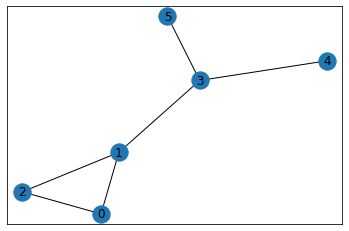

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class GraphVisualization:

	def __init__(self):
		self.visual = []

	def addEdges(self, elist):
		self.visual.extend(elist)
  
	def visualize(self):
		G = nx.Graph()
		G.add_edges_from(self.visual)
		nx.draw_networkx(G)
		plt.show()
  



elist=[(0, 2),(1, 2),(1, 3),(5, 3),(3, 4),(1, 0)]

G = GraphVisualization()
G.addEdges(elist)
G.visualize()



[(1, 0), (1, 2)]
BFS path [(1, 4), (1, 2), (4, 3), (2, 8), (2, 5), (2, 7), (3, 10), (3, 9), (5, 6)]
DFS path [(1, 4), (4, 3), (3, 10), (3, 2), (2, 8), (8, 7), (7, 5), (5, 6), (3, 9)]


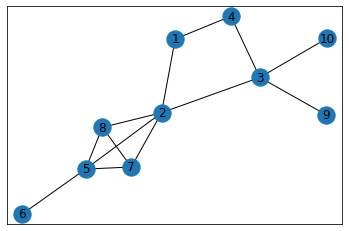

In [ ]:
G = nx.path_graph(3)
print(list(nx.bfs_tree(G, 1).edges()))
[(1, 0), (1, 2)]
H = nx.Graph()
nx.add_path(H, [1,4,3,10])
nx.add_path(H, [1,2,3,9])
nx.add_path(H, [1,2,3,9])
nx.add_path(H, [1,2,8,7,5,6])
nx.add_path(H, [2,5,8])
nx.add_path(H, [2,7])
nx.draw_networkx(H)
print("BFS path",list(nx.bfs_tree(H, source=1).edges()))
print("DFS path",list(nx.dfs_edges(H, source=1)))

#### Single source shortest path for unweighted graph

In [ ]:
path= nx.single_source_shortest_path(H, 1)
path[7]


[1, 2, 7]

In [ ]:
graph = {'A': ['B', 'C'],
         'B': ['A', 'D', 'E'],
         'C': ['A', 'F'],
         'D':['B'],
         'E': ['B', 'F'],
         'F': ['C', 'E']}
G=nx.Graph(graph)
nx.draw_networkx(G)

NameError: ignored

In [ ]:
list1=list(map(str, input("Enter the nodes in the graph").split()))
graph2=dict()
for l in list1:
  graph2[l]=list(map(str, input(f"Enter the adjacent nodes to {l}").split()))

print(graph2)



Enter the nodes in the graphA B C D E F
Enter the adjacent nodes to AB C
Enter the adjacent nodes to BA D E
Enter the adjacent nodes to CA F
Enter the adjacent nodes to DB
Enter the adjacent nodes to EB F
Enter the adjacent nodes to FC E
{'A': ['B', 'C'], 'B': ['A', 'D', 'E'], 'C': ['A', 'F'], 'D': ['B'], 'E': ['B', 'F'], 'F': ['C', 'E']}


DEPTH FIRST SEARCH

In [ ]:
visited = set() 

def dfs(visited, graph, node):
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# Driver Code
dfs(visited, graph, 'A')

NameError: ignored

Breadth First Search

In [ ]:
visited = [] 
queue = []   

def bfs(visited, graph, node):
  visited.append(node)
  queue.append(node)

  while queue:
    s = queue.pop(0) 
    print (s, end = " ") 

    for neighbour in graph[s]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

bfs(visited, graph, 'A')

A B C D E F 